In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [75]:
df = pd.read_csv(r'C:\Users\admin\Desktop\tweets_airline_sentiment.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
1,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
2,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
3,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
4,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


In [76]:
df.shape

(10640, 15)

In [77]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,10640.0,5.692175e+17,7.788568e+14,5.675900e+17,5.685560e+17,5.694750e+17,5.698914e+17,5.703106e+17
airline_sentiment_confidence,10640.0,8.994369e-01,1.632374e-01,3.353000e-01,6.915000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,7672.0,6.327324e-01,3.312624e-01,0.000000e+00,3.592750e-01,6.701000e-01,1.000000e+00,1.000000e+00
retweet_count,10640.0,7.763158e-02,6.385401e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10640 entries, 0 to 10639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      10640 non-null  int64  
 1   airline_sentiment             10640 non-null  object 
 2   airline_sentiment_confidence  10640 non-null  float64
 3   negativereason                6670 non-null   object 
 4   negativereason_confidence     7672 non-null   float64
 5   airline                       10640 non-null  object 
 6   airline_sentiment_gold        31 non-null     object 
 7   name                          10640 non-null  object 
 8   negativereason_gold           26 non-null     object 
 9   retweet_count                 10640 non-null  int64  
 10  text                          10640 non-null  object 
 11  tweet_coord                   760 non-null    object 
 12  tweet_created                 10640 non-null  object 
 13  t

In [80]:
df.isnull().mean()

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373120
negativereason_confidence       0.278947
airline                         0.000000
airline_sentiment_gold          0.997086
name                            0.000000
negativereason_gold             0.997556
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.928571
tweet_created                   0.000000
tweet_location                  0.324812
user_timezone                   0.329323
dtype: float64

In [81]:
df.drop(['airline_sentiment_gold', 'tweet_coord', 'negativereason_gold'], 1, inplace=True)

In [82]:
df.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  3970
negativereason_confidence       2968
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  3456
user_timezone                   3504
dtype: int64

In [83]:
null_features = df.isnull().sum()[df.isnull().sum()>1].index.tolist()

for features in null_features:
    print('{}\n Features = {}\n Number of features = {}\n'.format(features, df[features].unique(), df[features].nunique()))

negativereason
 Features = [nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']
 Number of features = 10

negativereason_confidence
 Features = [0.        nan 0.7033 ... 0.6234 0.644  0.7255]
 Number of features = 1296

tweet_location
 Features = [nan 'Lets Play' 'San Francisco CA' ... 'Central Ohio'
 'Milwaukee County, Wisconsin' 'Nigeria,lagos']
 Number of features = 2594

user_timezone
 Features = ['Pacific Time (US & Canada)' 'Central Time (US & Canada)'
 'Eastern Time (US & Canada)' 'America/New_York' 'Atlantic Time (Canada)'
 'Quito' nan 'Mountain Time (US & Canada)' 'Vienna' 'Kuala Lumpur'
 'Brisbane' 'London' 'Arizona' 'Tehran' 'Alaska' 'Sydney' 'Caracas'
 'Santiago' 'Amsterdam' 'Central America' 'Tijuana' 'Edinburgh' 'Hawaii'
 'Paris' 'Guam' 'New Delhi' 'Berlin' 'Madrid' 'Athens' 'America/Chicago'
 'Stockholm' 'Taipei' 'Abu Dhabi' 'Beijing

In [84]:
df['negativereason'] = np.where(df['negativereason'].isin(['Bad Flight', 'Flight Attendant Complaints',
                                                           'Cancelled Flight', 'Late Flight']),'Flight Issues',
                   np.where(df['negativereason'].isin(['Customer Service Issue', 'Flight Booking Problems',
                                                      'longlines']),'Customer Service Issues',
                            np.where(df['negativereason'].isin(['Lost Luggage',
                                                                'Damaged Luggage']),'Luggage Issues','Unknown')))

In [85]:
df['negativereason_confidence'].fillna(df['negativereason_confidence'].mean(), inplace=True)

In [86]:
df['airline_sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

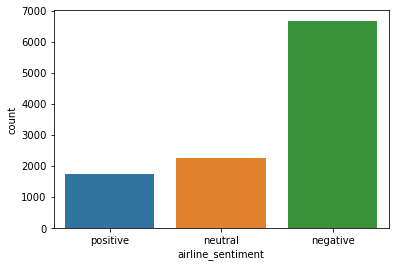

In [87]:
sns.countplot('airline_sentiment', data=df)

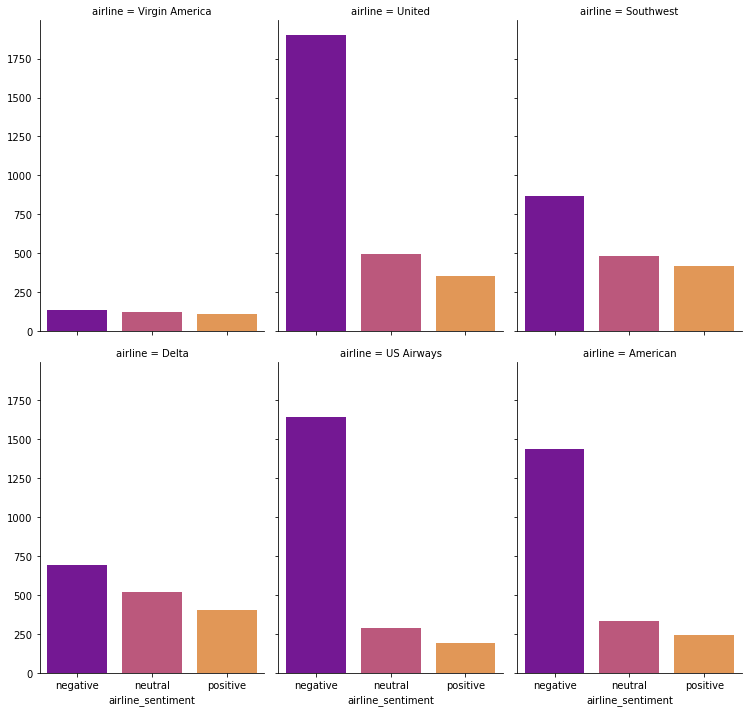

In [88]:
g = sns.FacetGrid(df, col='airline', col_wrap=3, height=5, aspect =0.7) 
g = g.map(sns.countplot, 'airline_sentiment', order =df['airline_sentiment'].value_counts().index, palette='plasma')

In [89]:
for pos in df[df['airline_sentiment']=="positive"].sample(10, random_state=10)['text']:
    print(pos)

@USAirways it was customer service like I have never seen before!  Kudos to your organization.
@AmericanAir I love your company and your staff is amazing. They just made an uncomfortable situation comfortable
@united I appreciate the follow up.
@JetBlue boarding the back of the airplane first. Like a boss. #sosmart #jetblue #frequentflyerappreciates #alsoyayforsnacks
@AmericanAir mission accomplished today, Thank you!
@united thnx
@united thank you for following up!
@JetBlue thanks so much!! ❤️✨ very relaxing flight!
@USAirways thanks for seating me next to 2 hot athletes. This flight is significantly better now!
@united awesome new plane flight 1701


In [90]:
for neg in df[df['airline_sentiment']=="negative"].sample(10, random_state=10)['text']:
    print(neg)

@AmericanAir continues to win: I've never missed a flight before, but a nice little quiet gate change made it possible. Sheesh.
@united is that all that matters, not the fact that we're at a different destination, we were put through a tremendous amount of stress,
@USAirways your lack of customer service has shined. I need you to step up and get my lost baggage to delta. So they can return it to me.
@united Terribly disappointed. Confirmed reservation delayed and your cust. service staff was not helpful in finding an alternate solution.
@united what is this subtlety gate changes? Are you kidding with me?
@SouthwestAir and now no wifi??? Come on.
@JetBlue is flight 51 on 4/24/15 moved back? When I booked it said we arrive 11:31 but now it says 12:08 😢
@AmericanAir complt incompetence on flt 295.Lav delay from a pln that lnded last nite, no internet and poor svc. Not what I expect from u.
@united @annricord 0162431184663.
3 of your agents said we would be refunded. Agents said United sho

In [91]:
for neu in df[df['airline_sentiment']=="neutral"].sample(10, random_state=10)['text']:
    print(neu)

@JetBlue you guys get rid of the hip hop stations on Sirius XM?
@JetBlue deal!
@united can I request a ticket change through twitter ?
@united My mom left her Kindle on flight 1544 today. Burgundy case with a light. Seat 27D. Did anyone find it?
@USAirways am 2. 1/2 hours from airport sure would like to talk to someone
@JetBlue well I'm not sure I'm that bold! lol or are you saying you didn't believe me?? :P
@united can you send me another confirmation email?
@SouthwestAir first time flyer, scheduled a (round)trip. set on departure date not sure on returning date, policy/fees on changing Re Flight
@SouthwestAir still haven't been able to get through, thanks for responding
@USAirways we even offered to fly in to another airport and they said they couldn't do that. No explanation why they can't.


In [92]:
from nltk.tokenize import WordPunctTokenizer
import re

tokenizer = WordPunctTokenizer()

def cleaning_tweets(text):
    text = re.sub(r'@+', '', text)
    text = re.sub('http?://[A-Za-z0-9./]+', '', text)
    text = re.sub("[^a-zA-Z]", " ", text)
    lower_case = text.lower()
    words = tokenizer.tokenize(lower_case)
    return (" ".join(words)).strip()

In [93]:
df['text'] = df['text'].apply(cleaning_tweets)

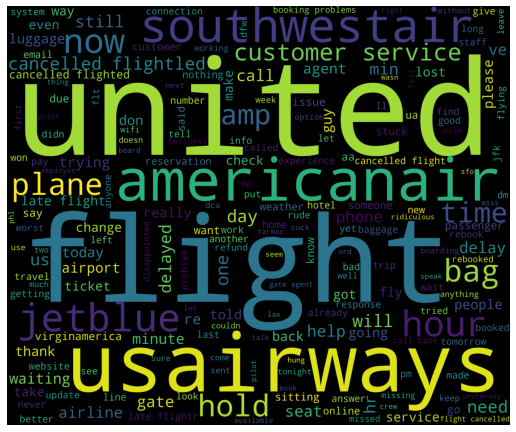

In [22]:
from wordcloud import WordCloud, STOPWORDS

df_pos = df[df['airline_sentiment']=='negative']
words_pos = ' '.join(df_pos['text'])

wc_pos = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words_pos)
plt.figure(figsize=(9,9))
plt.imshow(wc_pos)
plt.axis('off')
plt.show()

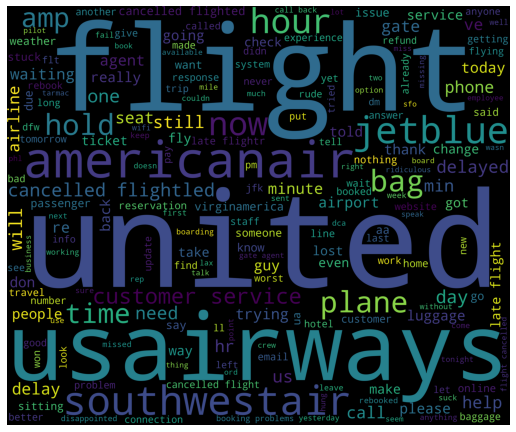

In [23]:
df_neg = df[df['airline_sentiment']=='negative']
words_neg = ' '.join(df_neg['text'])

wc_neg = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words_neg)
plt.figure(figsize=(9,9))
plt.imshow(wc_neg)
plt.axis('off')
plt.show()

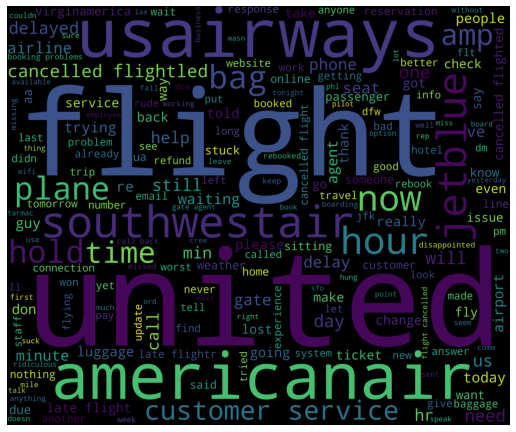

In [24]:
df_neu = df[df['airline_sentiment']=='negative']
words_neu = ' '.join(df_neu['text'])

wc_neu = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words_neu)
plt.figure(figsize=(9,9))
plt.imshow(wc_neu)
plt.axis('off')
plt.show()

In [94]:
 df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570301130888122368,positive,0.3486,Unknown,0.000000,Virgin America,jnardino,0,virginamerica plus you ve added commercials to...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
1,570301083672813571,neutral,0.6837,Unknown,0.632732,Virgin America,yvonnalynn,0,virginamerica i didn t today must mean i need ...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [95]:
df['tweet_created_date'] = pd.to_datetime(df['tweet_created'])
df['tweet_created_date'] = df['tweet_created_date'].dt.date

days = df.groupby(['tweet_created_date','airline','airline_sentiment']).size()
days

tweet_created_date  airline         airline_sentiment
2015-02-16          Delta           negative              1
                    United          negative              2
2015-02-17          Delta           negative             79
                                    neutral              67
                                    positive             46
                                                         ..
2015-02-24          United          neutral              35
                                    positive             21
                    Virgin America  negative              7
                                    neutral               4
                                    positive             12
Length: 134, dtype: int64

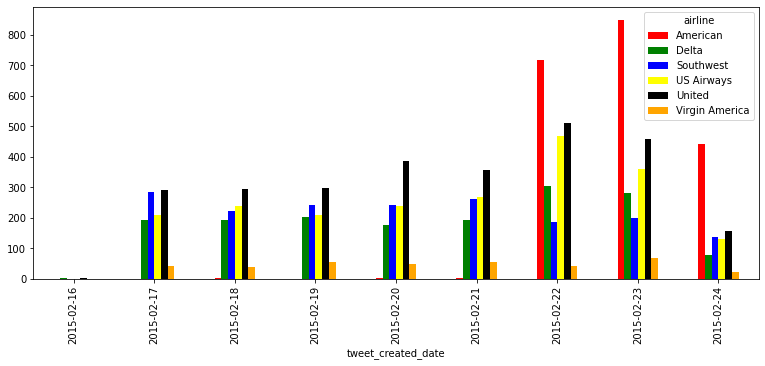

In [96]:
days.groupby(['tweet_created_date','airline']).sum().unstack().plot(kind = 'bar',
                                                                 color=['red', 'green', 'blue','yellow','black','orange'], 
                                                                 figsize = (13,5))

In [97]:
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,tweet_created_date
0,570301130888122368,positive,0.3486,Unknown,0.000000,Virgin America,jnardino,0,virginamerica plus you ve added commercials to...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2015-02-24
1,570301083672813571,neutral,0.6837,Unknown,0.632732,Virgin America,yvonnalynn,0,virginamerica i didn t today must mean i need ...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2015-02-24


In [98]:
df['tweet_created_year'] = pd.DatetimeIndex(df['tweet_created_date']).year
df['tweet_created_month'] = pd.DatetimeIndex(df['tweet_created_date']).month
df['tweet_created_day'] = pd.DatetimeIndex(df['tweet_created_date']).day

In [99]:
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,tweet_created_date,tweet_created_year,tweet_created_month,tweet_created_day
0,570301130888122368,positive,0.3486,Unknown,0.000000,Virgin America,jnardino,0,virginamerica plus you ve added commercials to...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2015-02-24,2015,2,24
1,570301083672813571,neutral,0.6837,Unknown,0.632732,Virgin America,yvonnalynn,0,virginamerica i didn t today must mean i need ...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2015-02-24,2015,2,24


In [100]:
df.drop(['tweet_location', 'user_timezone', 'name', 'tweet_id', 'tweet_created_date',
         'tweet_created', 'tweet_created_month', 'tweet_created_year'], 1, inplace=True)

In [101]:
df.head(2)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created_day
0,positive,0.3486,Unknown,0.000000,Virgin America,0,virginamerica plus you ve added commercials to...,24
1,neutral,0.6837,Unknown,0.632732,Virgin America,0,virginamerica i didn t today must mean i need ...,24


negative
[('to', 4326), ('i', 3313), ('the', 3021), ('a', 2344), ('flight', 2113), ('united', 2101), ('and', 2049), ('on', 2023), ('for', 1999), ('you', 1959), ('my', 1726), ('usairways', 1722), ('americanair', 1549), ('is', 1526), ('t', 1327)]


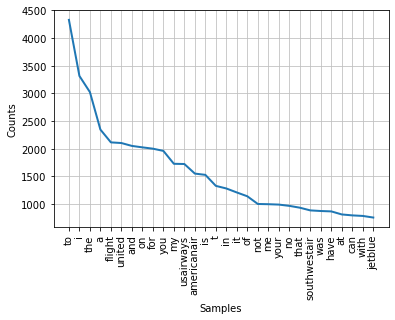


neutral
[('to', 1185), ('i', 1004), ('the', 730), ('a', 616), ('you', 561), ('jetblue', 540), ('united', 530), ('southwestair', 489), ('on', 479), ('for', 443), ('flight', 436), ('my', 391), ('is', 372), ('americanair', 363), ('in', 355)]


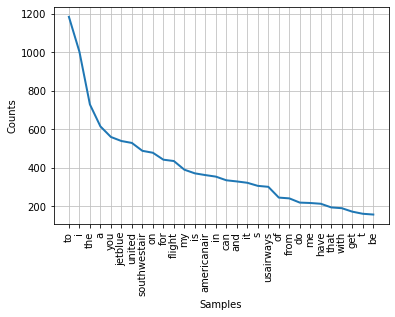


positive
[('the', 690), ('to', 675), ('you', 672), ('i', 555), ('for', 493), ('thanks', 448), ('jetblue', 443), ('southwestair', 424), ('a', 385), ('united', 376), ('thank', 336), ('and', 306), ('flight', 269), ('my', 263), ('americanair', 254)]


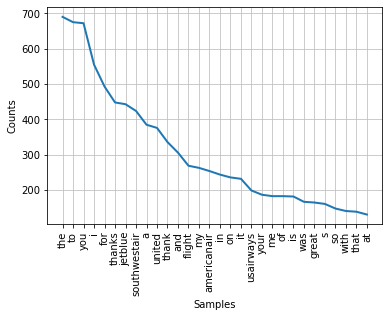

In [102]:
from nltk.probability import FreqDist
import matplotlib as plt
from collections import Counter

for name, subset in df.groupby('airline_sentiment'):
    sentiment = subset['text']
    words = []
    for i in sentiment:
        words.extend(i.split(" "))
    print(name)
    print(Counter(words).most_common(15))
    fdist = FreqDist(words)
    fdist.plot(30, cumulative=False)
    print() 

In [103]:
punctuation = re.compile(r'[-.?!,:;()|0-9]')
post_punctuation = []

def remove_punctuations(gold_word_tokenize):
    for words in gold_word_tokenize:
        word = punctuation.sub("", words)
        if len(word)>0:
            post_punctuation.append(word)
    return post_punctuation


In [104]:
def stopwords_removal(post_punctuation):
    
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    
    stop_words = stopwords.words('english')
    post_stop_words = []
    word_tokenize = word_tokenize(post_punctuation)
    for words in word_tokenize:
        words = words.lower()
        if words not in stop_words:
            post_stop_words.append(words)           
    return (" ".join(post_stop_words)).strip()

In [105]:
df['text'] = df['text'].apply(stopwords_removal)

In [106]:
df.head(2)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created_day
0,positive,0.3486,Unknown,0.000000,Virgin America,0,virginamerica plus added commercials experienc...,24
1,neutral,0.6837,Unknown,0.632732,Virgin America,0,virginamerica today must mean need take anothe...,24


negative
[('flight', 2113), ('united', 2101), ('usairways', 1722), ('americanair', 1549), ('southwestair', 884), ('jetblue', 755), ('get', 728), ('cancelled', 648), ('service', 530), ('hours', 502), ('help', 443), ('customer', 428), ('time', 426), ('hold', 424), ('plane', 387)]


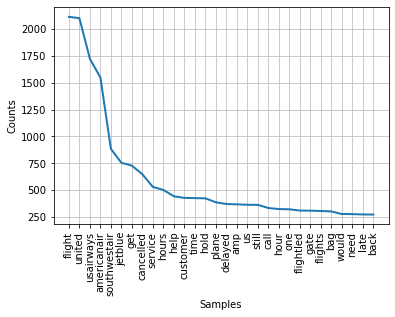


neutral
[('jetblue', 540), ('united', 530), ('southwestair', 489), ('flight', 436), ('americanair', 363), ('usairways', 302), ('get', 173), ('please', 132), ('virginamerica', 130), ('flights', 130), ('help', 121), ('thanks', 115), ('need', 114), ('would', 92), ('dm', 91)]


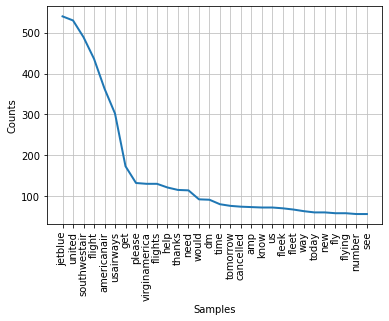


positive
[('thanks', 448), ('jetblue', 443), ('southwestair', 424), ('united', 376), ('thank', 336), ('flight', 269), ('americanair', 254), ('usairways', 199), ('great', 165), ('service', 120), ('virginamerica', 114), ('love', 105), ('best', 85), ('customer', 85), ('good', 82)]


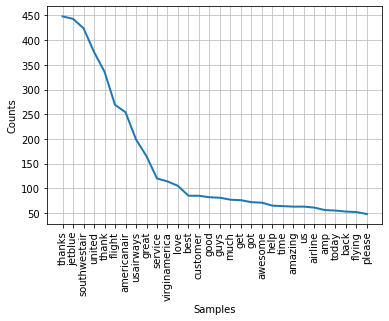

In [107]:
from nltk.probability import FreqDist
import matplotlib as plt
from collections import Counter

for name, subset in df.groupby('airline_sentiment'):
    sentiment = subset['text']
    words = []
    for i in sentiment:
        words.extend(i.split(" "))
    print(name)
    print(Counter(words).most_common(15))
    fdist = FreqDist(words)
    fdist.plot(30, cumulative=False)
    print() 

In [108]:
def removing_explicit_words(text, remove_word_list):
    words_list = text.split(" ")
    word_list = [x for x in words_list if x not in remove_word_list]
    return (" ".join(word_list)).strip()    

In [109]:
removal_word_list = ['americanair','united','delta','southwestair','jetblue','virginamerica','usairways','flight','plane']
df['text'] = df['text'].apply(removing_explicit_words, remove_word_list=removal_word_list)

In [110]:
df.head(2)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created_day
0,positive,0.3486,Unknown,0.000000,Virgin America,0,plus added commercials experience tacky,24
1,neutral,0.6837,Unknown,0.632732,Virgin America,0,today must mean need take another trip,24


In [111]:
from nltk.util import bigrams, trigrams, ngrams
from collections import Counter

for name, subset in df.groupby('airline_sentiment'):
    sentiment = subset['text']
    words=[]
    for i in sentiment:
        words.extend(i.split(" "))
    print(name)
    x = Counter(words).most_common(15)
    trigrams = list(ngrams(words, 2))
    print(trigrams)
    print() 

negative
[('really', 'aggressive'), ('aggressive', 'blast'), ('blast', 'obnoxious'), ('obnoxious', 'entertainment'), ('entertainment', 'guests'), ('guests', 'faces'), ('faces', 'amp'), ('amp', 'little'), ('little', 'recourse'), ('recourse', 'really'), ('really', 'big'), ('big', 'bad'), ('bad', 'thing'), ('thing', 'sfo'), ('sfo', 'pdx'), ('pdx', 'schedule'), ('schedule', 'still'), ('still', 'mia'), ('mia', 'first'), ('first', 'fares'), ('fares', 'may'), ('may', 'three'), ('three', 'times'), ('times', 'carriers'), ('carriers', 'seats'), ('seats', 'available'), ('available', 'select'), ('select', 'guys'), ('guys', 'messed'), ('messed', 'seating'), ('seating', 'reserved'), ('reserved', 'seating'), ('seating', 'friends'), ('friends', 'guys'), ('guys', 'gave'), ('gave', 'seat'), ('seat', 'away'), ('away', 'want'), ('want', 'free'), ('free', 'internet'), ('internet', 'status'), ('status', 'match'), ('match', 'program'), ('program', 'applied'), ('applied', 'three'), ('three', 'weeks'), ('weeks

In [112]:
df.head(2)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created_day
0,positive,0.3486,Unknown,0.000000,Virgin America,0,plus added commercials experience tacky,24
1,neutral,0.6837,Unknown,0.632732,Virgin America,0,today must mean need take another trip,24


In [113]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['airline_sentiment'] = le.fit_transform(df['airline_sentiment'])
df['negativereason'] = le.fit_transform(df['negativereason'])
df['airline'] = le.fit_transform(df['airline'])
df.head(2)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created_day
0,2,0.3486,3,0.000000,5,0,plus added commercials experience tacky,24
1,1,0.6837,3,0.632732,5,0,today must mean need take another trip,24


In [114]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

x_train = vectorizer.fit_transform(df['text'])
cv_matrix = x_train.toarray()
print(cv_matrix)
print()
print(cv_matrix.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

(10640, 10127)


In [115]:
vocab = vectorizer.get_feature_names()
text_split = pd.DataFrame(cv_matrix, columns=vocab)
text_split

,aa,aaaand,aaadvantage,aaalwayslate,aacustomerservice,aadavantage,aadelay,aadv,aadvantage,aafail,aal,aarp,aateam,aback,abassinet,abbreve,abc,abcletjetbluestreamfeed,abcnetwork,abcnews,abducted,abi,abigailedge,abilities,ability,able,aboard,aboout,abounds,abq,abroad,absolute,absolutely,absorber,absoulutely,absurd,absurdity,absurdly,abt,abundance,abuse,abused,abysmal,ac,acc,accelerate,accept,acceptable,accepted,accepting,access,accessible,accident,accidentally,accidents,accomidating,accommodate,accommodated,accommodates,accommodating,accommodation,accommodations,accompaniments,accompany,accomplished,according,accordingly,account,accountability,accountable,accounts,acct,accts,accumulation,accurate,accurately,accuratetraveltimes,accused,achieve,achieves,ack,acknowledge,acknowledgement,acknowledgment,acosta,acoustic,acpt,acquired,acquisition,across,act,acted,acting,action,actions,activate,activated,active,actively,activities,activity,acts,actual,actually,actualy,acu,ad,ada,adam,adams,adapted,add,added,adding,additional,additonal,addr,address,addressed,addresses,addressing,adds,addtl,adjacent,adjusting,adjustment,adjustments,admin,admiral,admirals,admiralsclub,admit,adolfo,adopted,adopting,adore,ads,adult,adv,advance,advantage,adventure,advertise,advertising,advice,advis,advise,advised,advising,advisories,advisory,advsry,aegeanairlines,aerocivilcol,aerojobmarket,aesthetics,aex,af,affairs,affect,affected,affecting,affects,affiliated,affiliates,afford,affordable,afiliates,afraid,african,aft,afterall,afternoon,aftr,age,aged,agencies,agency,agent,agents,ages,aggiemensgolf,aggravating,aggravation,aggressive,aging,agnt,ago,agpb,agree,agreed,agreement,agt,agts,ah,ahah,ahead,ahem,ahhhh,ahhhhh,ahold,ailing,aim,aimed,air,airborne,airbus,airbusintheus,aircanada,aircargo,aircraft,aircrafts,aircrft,aired,airfare,airfarewatchdog,airline,airlineadviser,airlinegave,airlinegeeks,airlinequality,airliner,airlines,airnzusa,airplane,airplanemodewason,airplanes,airport,airportcardio,airports,airpt,airserv,airside,airsouthwest,airspace,airstairs,airtahitinui,airway,airways,ais,aisle,aisles,aka,alabama,alamo,alan,alarm,alas,alaska,alaskaair,...,wing,wings,winks,winkwink,winner,winners,winning,winnipeg,wins,winston,winter,winterops,winters,winterstorm,winterweather,winwin,wiped,wipes,wired,wireless,wires,wiser,wish,wishing,wit,withheld,within,without,witness,witty,wiyh,wjere,wk,wknd,wks,wld,wmcactionnews,wmn,wn,wnqvm,wo,woase,woaw,woeful,woke,woman,women,wonder,wondered,wonderful,wonderfully,wondering,wonked,wont,wontflyagainwithyou,woo,woodland,woody,woof,woohoo,word,words,wore,work,workaround,worked,worker,workers,workforce,workforces,workhard,workin,working,workng,workout,works,worksnicely,world,worlds,worm,worn,worried,worries,worrisome,worry,worrying,worse,worst,worstairline,worstairlineever,worstcustomerservice,worstcustomerserviceever,worstcustservice,worstever,worstflight,worstflightever,worstflightexperienceever,worsttraveldayever,worth,worthless,worthy,would,woulda,wouldve,wounded,woven,wow,wpg,wrap,wrath,wreck,wrecked,wrecking,wrench,write,writers,writes,writing,written,wrong,wrongfully,wrongiswrong,wrote,ws,wsj,wsjplus,wt,wtf,wtfodds,wth,wtop,wtvd,wtw,wudda,wut,wway,wwr,wx,wylie,xaowkv,xcvqxykg,xd,xdaily,xfinity,xgfs,xjared,xld,xm,xmas,xna,xox,xoxo,xt,xtra,xw,xweekly,xx,xxx,xzmscw,ya,yaffasolin,yall,yards,yasss,yasssss,yay,yayayay,yb,ybv,yday,yea,yeah,year,yearly,years,yearslate,yeehaw,yell,yelled,yelling,yellow,yeniettelswood,yep,yes,yest,yesterday,yet,yhz,yield,yikes,yo,yoga,yogurt,york,yorkshire,youareonyourown,youcouldntmakethis,youd,youdidit,youknowyouwantto,young,younger,youragentshavenoclue,yourairlinesucks,youre,youretheworst,yourphonesystemsucks,yousuck,yout,youth,youve,yow,yr,yrs,ystrdy,yuck,yucki,yul,yuma,yummy,yup,yvonne,yvonneokaka,yvr,yw,ywg,yxe,yxu,yyj,yyz,zabsonre,zacks,zagging,zakkohane,zambia,zcc,zero,zfv,zgoqoxjbqy,zig,zip,zkatcher,zone,zones,zoom,zrh,zukes,zurich,zv,zz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [116]:
df = pd.concat([text_split, df.drop('text', 1)], axis=1, join='inner')
df.head()

,aa,aaaand,aaadvantage,aaalwayslate,aacustomerservice,aadavantage,aadelay,aadv,aadvantage,aafail,aal,aarp,aateam,aback,abassinet,abbreve,abc,abcletjetbluestreamfeed,abcnetwork,abcnews,abducted,abi,abigailedge,abilities,ability,able,aboard,aboout,abounds,abq,abroad,absolute,absolutely,absorber,absoulutely,absurd,absurdity,absurdly,abt,abundance,abuse,abused,abysmal,ac,acc,accelerate,accept,acceptable,accepted,accepting,access,accessible,accident,accidentally,accidents,accomidating,accommodate,accommodated,accommodates,accommodating,accommodation,accommodations,accompaniments,accompany,accomplished,according,accordingly,account,accountability,accountable,accounts,acct,accts,accumulation,accurate,accurately,accuratetraveltimes,accused,achieve,achieves,ack,acknowledge,acknowledgement,acknowledgment,acosta,acoustic,acpt,acquired,acquisition,across,act,acted,acting,action,actions,activate,activated,active,actively,activities,activity,acts,actual,actually,actualy,acu,ad,ada,adam,adams,adapted,add,added,adding,additional,additonal,addr,address,addressed,addresses,addressing,adds,addtl,adjacent,adjusting,adjustment,adjustments,admin,admiral,admirals,admiralsclub,admit,adolfo,adopted,adopting,adore,ads,adult,adv,advance,advantage,adventure,advertise,advertising,advice,advis,advise,advised,advising,advisories,advisory,advsry,aegeanairlines,aerocivilcol,aerojobmarket,aesthetics,aex,af,affairs,affect,affected,affecting,affects,affiliated,affiliates,afford,affordable,afiliates,afraid,african,aft,afterall,afternoon,aftr,age,aged,agencies,agency,agent,agents,ages,aggiemensgolf,aggravating,aggravation,aggressive,aging,agnt,ago,agpb,agree,agreed,agreement,agt,agts,ah,ahah,ahead,ahem,ahhhh,ahhhhh,ahold,ailing,aim,aimed,air,airborne,airbus,airbusintheus,aircanada,aircargo,aircraft,aircrafts,aircrft,aired,airfare,airfarewatchdog,airline,airlineadviser,airlinegave,airlinegeeks,airlinequality,airliner,airlines,airnzusa,airplane,airplanemodewason,airplanes,airport,airportcardio,airports,airpt,airserv,airside,airsouthwest,airspace,airstairs,airtahitinui,airway,airways,ais,aisle,aisles,aka,alabama,alamo,alan,alarm,alas,alaska,alaskaair,...,winnipeg,wins,winston,winter,winterops,winters,winterstorm,winterweather,winwin,wiped,wipes,wired,wireless,wires,wiser,wish,wishing,wit,withheld,within,without,witness,witty,wiyh,wjere,wk,wknd,wks,wld,wmcactionnews,wmn,wn,wnqvm,wo,woase,woaw,woeful,woke,woman,women,wonder,wondered,wonderful,wonderfully,wondering,wonked,wont,wontflyagainwithyou,woo,woodland,woody,woof,woohoo,word,words,wore,work,workaround,worked,worker,workers,workforce,workforces,workhard,workin,working,workng,workout,works,worksnicely,world,worlds,worm,worn,worried,worries,worrisome,worry,worrying,worse,worst,worstairline,worstairlineever,worstcustomerservice,worstcustomerserviceever,worstcustservice,worstever,worstflight,worstflightever,worstflightexperienceever,worsttraveldayever,worth,worthless,worthy,would,woulda,wouldve,wounded,woven,wow,wpg,wrap,wrath,wreck,wrecked,wrecking,wrench,write,writers,writes,writing,written,wrong,wrongfully,wrongiswrong,wrote,ws,wsj,wsjplus,wt,wtf,wtfodds,wth,wtop,wtvd,wtw,wudda,wut,wway,wwr,wx,wylie,xaowkv,xcvqxykg,xd,xdaily,xfinity,xgfs,xjared,xld,xm,xmas,xna,xox,xoxo,xt,xtra,xw,xweekly,xx,xxx,xzmscw,ya,yaffasolin,yall,yards,yasss,yasssss,yay,yayayay,yb,ybv,yday,yea,yeah,year,yearly,years,yearslate,yeehaw,yell,yelled,yelling,yellow,yeniettelswood,yep,yes,yest,yesterday,yet,yhz,yield,yikes,yo,yoga,yogurt,york,yorkshire,youareonyourown,youcouldntmakethis,youd,youdidit,youknowyouwantto,young,younger,youragentshavenoclue,yourairlinesucks,youre,youretheworst,yourphonesystemsucks,yousuck,yout,youth,youve,yow,yr,yrs,ystrdy,yuck,yucki,yul,yuma,yummy,yup,yvonne,yvonneokaka,yvr,yw,ywg,yxe,yxu,yyj,yyz,zabsonre,zacks,zagging,zakkohane,zambia,zcc,zero,zfv,zgoqoxjbqy,zig,zip,zkatcher,zone,zones,zoom,zrh,zukes,zurich,zv,zz,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_cou

In [117]:
X = df.drop('airline_sentiment', 1)
y = df['airline_sentiment']

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y, shuffle=True)
print('Shape of X_train = {} and X_test = {}'.format(X_train.shape, X_test.shape))

Shape of X_train = (7980, 10133) and X_test = (2660, 10133)


In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

clf_list = [DecisionTreeClassifier(), RandomForestClassifier(n_jobs=-1), MultinomialNB()]

df_clf = pd.DataFrame(columns = ['Name', 'Train Score', 'Test Score', 'Mean Accuracy'])

for clf in clf_list:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    clf_name = str(type(clf)).split('.')[-1][:-2]
    
    train = clf.score(X_train, y_train)
    
    test = clf.score(X_test, y_test)
    
    accuracy = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='accuracy', n_jobs=-1, verbose=2).mean()*100

    df_clf = df_clf.append({'Name': clf_name, 'Train Score': train, 'Test Score': test, 'Mean Accuracy': accuracy},
                  ignore_index=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   17.3s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   37.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   40.9s remaining:   40.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    7.6s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.0s finished


In [142]:
df_clf

,Name,Train Score,Test Score,Mean Accuracy
0,DecisionTreeClassifier,0.999875,0.909774,91.403509
1,RandomForestClassifier,0.999875,0.909774,91.265664
2,MultinomialNB,0.879825,0.783459,77.380952


In [143]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Confusion Matrix for train dataset \n{}'.format(confusion_matrix(y_train, y_pred_train)))
print()
print('Confusion Matrix for test dataset \n{}'.format(confusion_matrix(y_test, y_pred_test)))
print()
print('Accuracy for test = {}'.format(accuracy_score(y_test, y_pred_test)))
print()
print('Classification Report {}\n'.format(classification_report(y_test, y_pred)))

Confusion Matrix for train dataset 
[[5002    0    0]
 [   0 1686    0]
 [   0    1 1291]]

Confusion Matrix for test dataset 
[[1661    1    6]
 [   0  444  118]
 [   1  112  317]]

Accuracy for test = 0.9105263157894737

Classification Report               precision    recall  f1-score   support

           0       0.82      0.94      0.88      1668
           1       0.64      0.54      0.58       562
           2       0.76      0.52      0.62       430

    accuracy                           0.78      2660
   macro avg       0.74      0.66      0.69      2660
weighted avg       0.77      0.78      0.77      2660




In [149]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

def airline_roc_auc_score(y_test, y_pred,  average='macro'):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC Score = {}'.format(round(airline_roc_auc_score(y_test, y_pred), 4)))

ROC AUC Score = 0.7563
